## Sub-task 4

### Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

### Import Dataset and EDA

In [2]:
df = pd.read_csv('bs140513_032310.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
# removing customer id
df = df.drop(['customer'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   age          594643 non-null  object 
 2   gender       594643 non-null  object 
 3   zipcodeOri   594643 non-null  object 
 4   merchant     594643 non-null  object 
 5   zipMerchant  594643 non-null  object 
 6   category     594643 non-null  object 
 7   amount       594643 non-null  float64
 8   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 40.8+ MB


based on the above observations, we need to convert objects type to numeric

In [5]:
## check for null values
df.isnull().sum()

step           0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [6]:
# check whether the data is balanced or not
df.fraud.value_counts()

fraud
0    587443
1      7200
Name: count, dtype: int64

our dataset is imbalance, we need to balance it

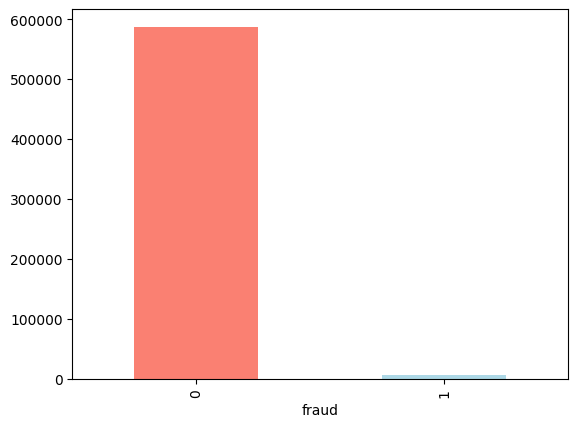

In [7]:
df.fraud.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

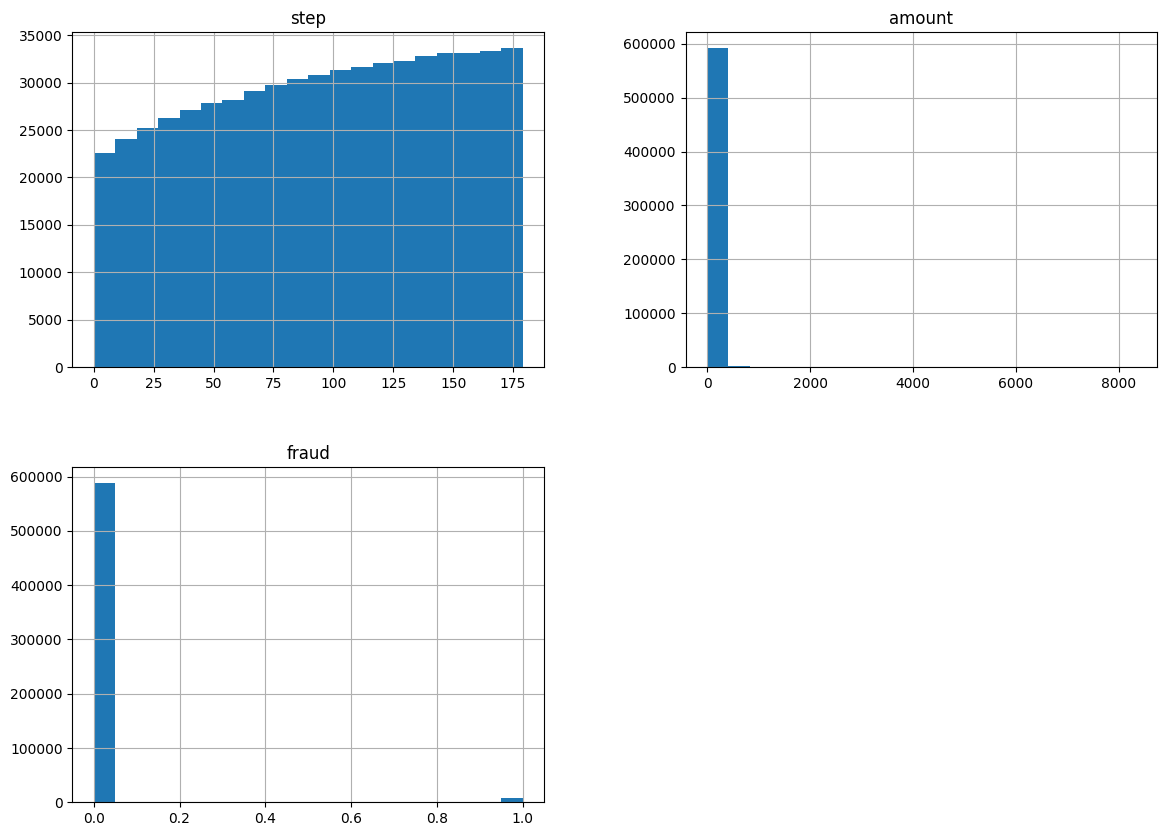

In [8]:
# check the distributioin
df.hist(figsize=(14,10), bins=20);

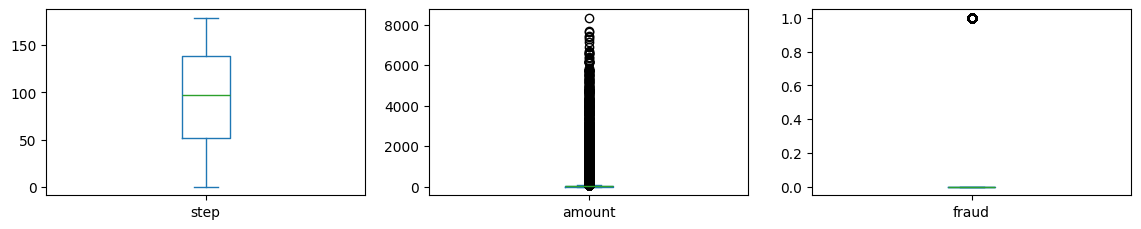

In [9]:
# check for outliers
df.plot(kind='box', subplots=True, layout=(5,3), sharex=False,sharey=False ,figsize =(14,14));

### Feature Engineering

In [10]:
# getting categorical columns and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [11]:
for col in num_cols:
    print(f"'{col}': having type *{df[col].dtype}* has {df[col].unique()} unique values\n")

'step': having type *int64* has [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179] unique values

'amount': having type *float64* has [  4.55  39.68  26.89 ... 249.18 224.81 190.31] unique values

'fraud': having type *int64* has [0 1] unique values



In [12]:
for col in cat_cols:
    print(f"'{col}': having type *{df[col].dtype}* has {df[col].unique()} unique values\n")

'age': having type *object* has ["'4'" "'2'" "'3'" "'5'" "'1'" "'6'" "'U'" "'0'"] unique values

'gender': having type *object* has ["'M'" "'F'" "'E'" "'U'"] unique values

'zipcodeOri': having type *object* has ["'28007'"] unique values

'merchant': having type *object* has ["'M348934600'" "'M1823072687'" "'M50039827'" "'M1888755466'"
 "'M1053599405'" "'M85975013'" "'M480139044'" "'M692898500'"
 "'M348875670'" "'M151143676'" "'M840466850'" "'M1741626453'"
 "'M1535107174'" "'M855959430'" "'M349281107'" "'M209847108'"
 "'M2122776122'" "'M1873032707'" "'M2011752106'" "'M857378720'"
 "'M1198415165'" "'M1748431652'" "'M980657600'" "'M1352454843'"
 "'M117188757'" "'M547558035'" "'M17379832'" "'M1649169323'"
 "'M1946091778'" "'M97925176'" "'M923029380'" "'M1353266412'"
 "'M1842530320'" "'M677738360'" "'M1313686961'" "'M732195782'"
 "'M1600850729'" "'M1872033263'" "'M3697346'" "'M495352832'"
 "'M1400236507'" "'M1294758098'" "'M1913465890'" "'M45060432'"
 "'M78078399'" "'M2080407379'" "'M17885

In [13]:
df.zipcodeOri.unique()

array(["'28007'"], dtype=object)

In [14]:
df.zipMerchant.unique()

array(["'28007'"], dtype=object)

based on the opservation we can remove `zipcodeOri` and `zipMerchant` features, cause it has only one values

In [15]:
df = df.drop(['zipcodeOri','zipMerchant'], axis=1)

In [16]:
df.head()

,step,age,gender,merchant,category,amount,fraud
0,0,'4','M','M348934600','es_transportation',4.55,0
1,0,'2','M','M348934600','es_transportation',39.68,0
2,0,'4','F','M1823072687','es_transportation',26.89,0
3,0,'3','M','M348934600','es_transportation',17.25,0
4,0,'5','M','M348934600','es_transportation',35.72,0


In [17]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']


# removing '' from [age,gender,merchant and category] features
for col in cat_cols:
    df[col] = df[col].str.replace("'", '')

# converting object to category type
for col in cat_cols:
    df[col] = df[col].astype('category')

In [18]:
df.head()

,step,age,gender,merchant,category,amount,fraud
0,0,4,M,M348934600,es_transportation,4.55,0
1,0,2,M,M348934600,es_transportation,39.68,0
2,0,4,F,M1823072687,es_transportation,26.89,0
3,0,3,M,M348934600,es_transportation,17.25,0
4,0,5,M,M348934600,es_transportation,35.72,0


In [19]:
# converting category data to interger
df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes)
df.head()

,step,age,gender,merchant,category,amount,fraud
0,0,4,2,30,12,4.55,0
1,0,2,2,30,12,39.68,0
2,0,4,1,18,12,26.89,0
3,0,3,2,30,12,17.25,0
4,0,5,2,30,12,35.72,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   age       594643 non-null  int8   
 2   gender    594643 non-null  int8   
 3   merchant  594643 non-null  int8   
 4   category  594643 non-null  int8   
 5   amount    594643 non-null  float64
 6   fraud     594643 non-null  int64  
dtypes: float64(1), int64(2), int8(4)
memory usage: 15.9 MB


In [21]:
# go through the data
for col in df.columns:
    print(f"'{col}': having type *{df[col].dtype}* has {df[col].unique()} unique values\n")

'step': having type *int64* has [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179] unique values

'age': having type *int8* has [4 2 3 5 1 6 7 0] unique values

'gender': having type *int8* has [2 1 0 3] unique values

'merchant': having type *int8* has [30 18 36 22  0 45 34 39 29  9 42 15 10 43 31 27 28 21 25 44  2 16

#### Handling imblance dataset

In [22]:
# handling implance dataset
X = df.drop(['fraud'], axis=1)
y = df['fraud']

print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 587443, 1: 7200})


In [23]:
os =  RandomUnderSampler()
X, y = os.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({0: 7200, 1: 7200})


In [24]:
df = X
df['fraud'] = y
df.head()

,step,age,gender,merchant,category,amount,fraud
264580,88,3,1,18,12,32.09,0
453056,141,3,1,18,12,49.95,0
402455,127,1,2,42,11,91.69,0
92208,34,5,2,45,3,16.58,0
67498,25,5,2,45,3,22.37,0


#### Train test split

In [25]:
X = df.drop(['fraud'], axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((11520, 6), (2880, 6))

### Model Training

In [27]:
def model_with_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
models = {"RandomForest": RandomForestClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression()}

model_scores = model_with_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores 

{'RandomForest': 0.9715277777777778,
 'SVC': 0.909375,
 'LogisticRegression': 0.9135416666666667}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

# Define a grid of hyperparameters
grid = {"n_estimators": [10, 100, 200, 500, 1000],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

rs_RFC = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions=grid,
                                n_iter=5,
                                verbose=True)

rs_RFC.fit(X_train, y_train)

rs_RFC.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [30]:
model = RandomForestClassifier( n_estimators=200,
                                max_depth=30)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200)

### Model Evaluation

In [31]:
y_pred = model.predict(X_test)
print(f'Accuracy-Score: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy-Score: 0.97
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1429
           1       0.96      0.98      0.97      1451

    accuracy                           0.97      2880
   macro avg       0.97      0.97      0.97      2880
weighted avg       0.97      0.97      0.97      2880



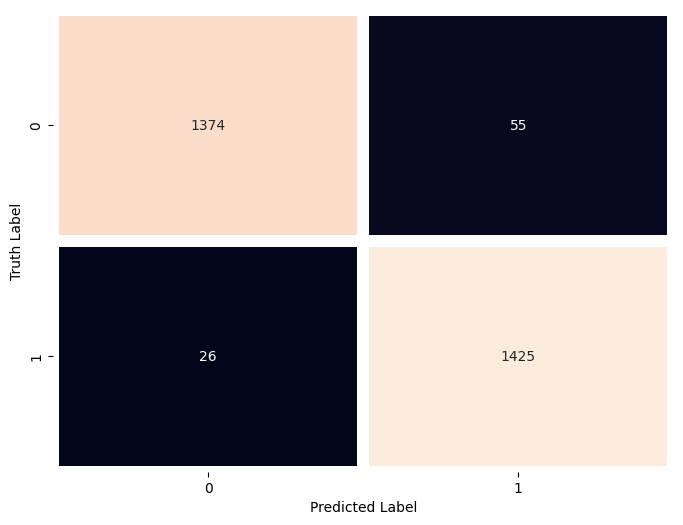

In [32]:
c_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, linewidths=8.5 , fmt= '', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

#### **Steps And Final Results**

* First, I explore the dataset and check for:

    * Null values
    * whether imblance or not
    * distribution
    * statistical analysis

* Next, Feature Engineering:

    * remove unimportant features
    * handle object types to numerical
    * hadnle imblance dataset
    * split data into train and test sets

* Finally, trained the model: 

    * I used different algorithms
    * Select the one with high accuracy
    * And use the  RandomizedSearchCV to select the best params
    * I evaluate my model and used classification report and confusion matrix to check the accuracy